<a id='top'></a>

# Homework 5: Confidence intervals and other things
***

**Name**: Adam Ten Hoeve

***

This assignment is due on Moodle by **5 PM on Friday November 9**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline

---

<a id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1 - Sea-level rise, schmee-level rise!

You have been contacted by the local government of Key West, Florida, to assess whether there is statistical evidence for sea-level rise in the area. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file [linked here](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm0rl5dp6y4) and below.

In this problem, you will:
1. practice calculating confidence intervals, 
1. practice wrangling a real-life data set into a form where you can actually compute these confidence intervals, because life will rarely be so kind as to simply hand you a nicely packaged and cleaned set of data, and
1. save Key West from a watery fate?

In [3]:
# Local and web paths to the data; pick which works for you.
local_path = "data/sealevel_keywest.csv"
web_path   = "https://raw.githubusercontent.com/dblarremore/csci3022/master/homework/homework5/data/sealevel_keywest.csv"
file_path  = local_path

dfSL = pd.read_csv(file_path, header=None)
dfSL.rename(columns={0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'SL'}, inplace=True)
dfSL.head()
# dfSL.loc[dfSL["Day"] == 1]

,Year,Month,Day,SL
0,1913,1,20,1453
1,1913,1,21,1439
2,1913,1,22,1444
3,1913,1,23,1489
4,1913,1,24,1474


**Part A:**  Write a function `clean_data` to:
1. take in a single argument of a raw sea level data frame (e.g., `dfSL` above),
2. compute the fill-value used to replace missing sea level (SL) data (**not** hard-coded!),
3. use the Pandas `DataFrame.dropna` method to remove all missing rows of data, 
4. select only the data point on the second day of each month, and
4. return a cleaned Pandas data frame.

Use your shiny new function to clean the `dfSL` data frame and save the results in a new data frame.

There is a very specific reason to sample only one daily data point per month. We will talk about it later.

In [4]:
def clean_data(df):
    
    # your code goes here!
    # Gets the minimum value, which is the fill value.
    fillValue = df.SL.min()
    
    # Get Rid of the min values
    dfClean = df.copy()
    dfClean.SL.replace(to_replace = fillValue, value = np.nan, inplace = True)
    dfClean.dropna(inplace = True) # Inplace doesn't make a copy, it alters the existing df
    
    # Return the second day of each month
    dfClean = dfClean.loc[dfClean["Day"] == 2]
    
    return dfClean

In [5]:
dfClean = clean_data(dfSL)
dfClean.head()

,Year,Month,Day,SL
13,1913,2,2,1409.0
41,1913,3,2,1397.0
72,1913,4,2,1402.0
102,1913,5,2,1450.0
133,1913,6,2,1490.0


**Part B:**  Plot the cleaned time series of sea levels. Be sure to label your axes, including units. The UHSLC data portal includes a link to the metadata accompanying our data set; if you are not sure about units, that would be a good place to start looking. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

**Bonus challenge (0 points):**  Why do we choose to work with the second day of each month instead of the first?  You may need to look at the original data set to answer this.

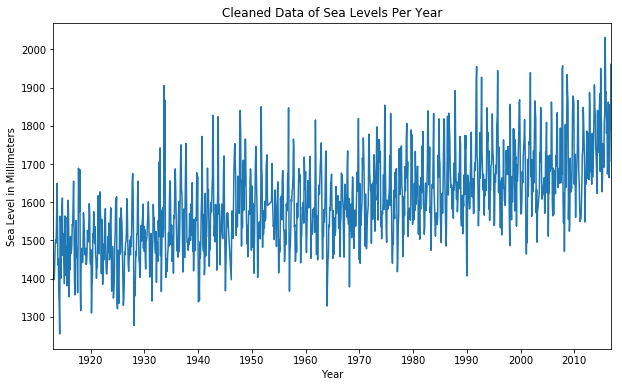

In [6]:
fig,ax = plt.subplots(1,1,figsize = (10,6))

index = dfClean.index[(dfClean["Month"] == 1) & (dfClean["Year"] % 10 == 0) & (dfClean["Day"] == 2)]

dfClean["SL"].plot()

# Where we put the ticks
ax.set_xticks(index)

# What we label the ticks
ax.set_xticklabels(dfClean.loc[index, "Year"])

ax.set_xlabel("Year")
ax.set_ylabel("Sea Level in Millimeters")
ax.set_title("Cleaned Data of Sea Levels Per Year");

**Part C:** Use your cleaned sea levels data frame to create two new Pandas data frames or series:
1. one object to contain the sea levels between (and including) the years 1986 and 1995, and
2. another object to contain the sea levels between (and including) the years 2006 and 2015.

Then, create a single-panel figure that includes density histograms of each decade of sea levels. Be sure to label everything appropriately.

Finally, based on the data in front of you, formulate and state a hypothesis about how the mean sea level in the decade 2006-2015 compares to the mean sea level in the decade 1986-1995.

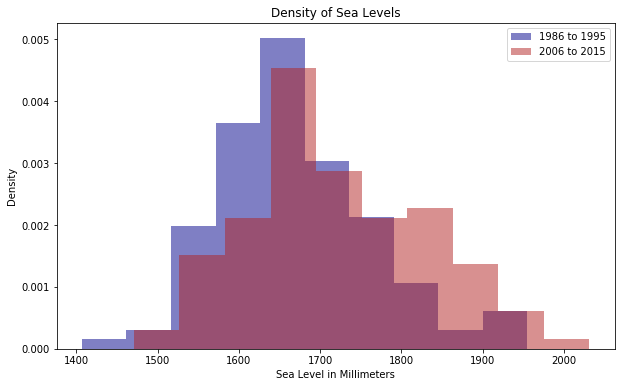

In [7]:
df1986 = dfClean.loc[(dfClean["Year"] >= 1986) & (dfClean["Year"] <= 1995)]
df2006 = dfClean.loc[(dfClean["Year"] >= 2006) & (dfClean["Year"] <= 2015)]

fig,ax = plt.subplots(1, 1, figsize = (10, 6))

ax.hist(df1986.SL, density = True, alpha = 0.5, color = "darkblue", label = "1986 to 1995")
ax.hist(df2006.SL, density = True, alpha = 0.5, color = "firebrick", label = "2006 to 2015")

ax.set_xlabel("Sea Level in Millimeters")
ax.set_ylabel("Density")
ax.set_title("Density of Sea Levels")
ax.legend();

From the figure above, we can see that the plot for 2006 to 2015 has a greater positive skew than the data from 1986 to 1995. Because of this, we can hypothesize that the mean from the 06_15 data is greater than the mean from the 86_95 data.

**Part D:** Compute a 99.9% confidence interval for each of (1) the mean sea level in the 1986-1995 decade ($\mu_{1986-1995}$) and (2) the mean sea level in the 2006-2015 decade ($\mu_{2006-2015}$).  You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

Based on these two confidence intervals, do you think there is sufficient evidence to conclude that there is or is not a significant difference in the mean sea level between 1986-1995 and 2006-2015? Justify your answer. 

We can solve the confidence interval using the equation:  $\bar{x} \pm z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}$  
99.9% confidence means $z_\alpha = 0.001$. $z_{\alpha/2}= 0.0005 = 3.2905$

For 1986-1995:  
$1670.575 \pm 3.2905*\Big( \dfrac{98.09}{\sqrt{120}} \Big) = [1641.1, 1700.0] $

For 2006 - 2015:  
$ 1720.7 \pm 3.2905*\Big( \dfrac{109.4}{\sqrt{118}} \Big) = [1687.5, 1753.8] $

The confidence intervals overlap so we can not conclude that there is significant statisitical evidence to support that there is a significant difference in means.

In [8]:
zAlpha = stats.norm.ppf(1-0.0005)
mean1986 = np.mean(df1986.SL)
std1986 = np.std(df1986.SL)
n1986 = len(df1986)
mean2006 = np.mean(df2006.SL)
std2006 = np.std(df2006.SL)
n2006 = len(df2006)

lower1986 = mean1986 - (zAlpha * std1986 / math.sqrt(n1986))
upper1986 = mean1986 + (zAlpha * std1986 / math.sqrt(n1986))

lower2006 = mean2006 - (zAlpha * std2006 / math.sqrt(n2006))
upper2006 = mean2006 + (zAlpha * std2006 / math.sqrt(n2006))

print("z-0.005 is {}".format(zAlpha))

print("The mean of df1986: {}".format(np.mean(mean1986)))
print("The Standard Deviation of df1986 is {}".format(std1986))
print("The number of samples of df1986 is {}".format(n1986))

print("The mean of df2006: {}".format(mean2006))
print("The Standard Deviation of df2006 is {}".format(std2006))
print("The number of samples of df2006 is {}".format(n2006))
print("CI for 1986: [{}, {}]".format(lower1986, upper1986))
print("CI for 2006: [{}, {}]".format(lower2006, upper2006))

z-0.005 is 3.2905267314919255
The mean of df1986: 1670.575
The Standard Deviation of df1986 is 98.09473843348242
The number of samples of df1986 is 120
The mean of df2006: 1720.677966101695
The Standard Deviation of df2006 is 109.36301557439
The number of samples of df2006 is 118
CI for 1986: [1641.1090455116241, 1700.040954488376]
CI for 2006: [1687.5499905823867, 1753.805941621003]


**Part E:**  Compute a 99.9% confidence interval for the ***difference in mean sea level*** between the 2006-2015 and the 1986-1995 decades ($\mu_{2006-2015} - \mu_{1986-1995}$. Based on this, make a conclusion regarding your hypothesis from **Part C**, and compare to what your results in **Part D** implied. You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

We can solve the Confidence Interval for the difference in means using the equations: $ \mu_{06-15} - \mu_{86-95} \pm z_{\alpha/2}\sqrt{\dfrac{\sigma_1^2}{m}+\dfrac{\sigma_2^2}{n}} $.

Using the numbers from above:

$$ CI = 1720.7 - 1670.6 \pm 3.29*\sqrt{\dfrac{109.4^2}{118} + \dfrac{98.1^2}{120}} $$

$$ CI = [5.7667, 94.4392] $$

This confirms our hypothesis from **Part C** that the mean of the 2006-2015 sea levels are higher than the mean sea levels of 1986-1995 because the confidence interval of the difference in means is positive and does not contain zero. This is different from our inference from **Part D** that said there is not significant evidence to support the difference in means. Spooky!

In [9]:
lowerDiff = mean2006 - mean1986 - (zAlpha * math.sqrt((std2006**2/n2006)+(std1986**2/n1986)))
upperDiff = mean2006 - mean1986 + (zAlpha * math.sqrt((std2006**2/n2006)+(std1986**2/n1986)))
CIdiff = [lowerDiff, upperDiff]
CIdiff

[5.7666916086917297, 94.439240594697964]

**Part F:**  The confidence intervals from **Parts D** and **E** were derived using the Central Limit Theorem.  Which assumption of the Central Limit Theorem would likely be violated if we took more than one measurement per month to form our samples, and why?

For us to use the Central Limit Theorem, we are assuming that all the data points are independent and identically distributed. If we were to take more measurement per moth then the likelyhood that the samples were independent would be decreased. For example, if we were to take two samples that were a day apart, then it is likely that the sea level of the second day depends on the sea level of the first day, so they wouldn't be independent.

---

<a id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2 - Quality of Red vs White Wine 

**Part A:** Load the data in [`winequalityred.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm1ebc6q6ye) and [`winequalitywhite.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm17x9pu6y9) into Pandas DataFrames.  They are available under Resources on Piazza, and linked here and below.  A description of this dataset can be found on [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The quantity of interest for this problem is the quality of the wine.

Are we justified in using the Central Limit Theorem in our analysis of estimates of the mean and proportions of the data?  Justify your response. 

In [10]:
# read either local or web file version; pick whichever works for you
local_file_white = "data/winequality-white.csv"
local_file_red   = "data/winequality-red.csv"
web_file_white = "https://raw.githubusercontent.com/dblarremore/csci3022/master/homework/homework5/data/winequality-white.csv"
web_file_red   = "https://raw.githubusercontent.com/dblarremore/csci3022/master/homework/homework5/data/winequality-red.csv"

dfRed   = pd.read_csv(local_file_red, delimiter=';')
dfWhite = pd.read_csv(local_file_white, delimiter=';')

In order for the CLT to be applicable, there must be many samples (more than 30) and they must be iid. There are 1599 samples of red wine and 4898 samples of white wine, so both have enough samples. We do not know if the samples are iid so that will be an assumption we are making to perform calculations.

In [11]:
print(len(dfRed))
print(len(dfWhite))

1599
4898


**Part B:** Let $X$ be a random variable denoting the quality of a bottle of wine, and let $C$ be a random variable denoting its color (either red ($r$) or white ($w$)). For the remainder of this problem, we are concerned with probabilities such as "If I buy a random bottle of red wine, what is the probability that its quality is at least a 7?". We could write that probability as $P(X \geq 7 \mid C=r)$, for example, and consider it the ***proportion*** of the population of red wines that are at least a 7 in quality. Calculate and report estimates of $P(X \geq 7 \mid C=r)$ and $P(X \geq 7 \mid C=w)$.

Obtain 95% confidence intervals for the proportion of red and white wines that are **at least** a 7 in quality (obtain one CI for each color).  Based on your results, if you are interested in buying many high quality bottles of wine but are buying totally at random, is one color a better bet than the other? Fully justify your answer.

Calculations may be executed in Python, but you need to set up your work (*what* it is you are calculating) in Markdown/MathJax.

In [12]:
dfRedQED7 = dfRed.loc[dfRed["quality"] >= 7]
redGEQ7 = len(dfRedQED7)
redTotal = len(dfRed)
propRedGEQ7 = redGEQ7 / redTotal
print("The proportion of red wines with quality >= 7 is: ", propRedGEQ7)
print("The number of samples of red wine is", redTotal)

dfWhiteQED7 = dfWhite.loc[dfWhite["quality"] >= 7]
whiteGEQ7 = len(dfWhiteQED7)
whiteTotal = len(dfWhite)
propWhiteGEQ7 = whiteGEQ7 / whiteTotal
print("The proportion of white wines with quality >= 7 is:", propWhiteGEQ7)
print("The number of samples of white wine is", whiteTotal)

zAlpha = stats.norm.ppf(1 - 0.025)

redUpper = propRedGEQ7 + (zAlpha * math.sqrt(propRedGEQ7 * (1 - propRedGEQ7) / redTotal))
redLower = propRedGEQ7 - (zAlpha * math.sqrt(propRedGEQ7 * (1 - propRedGEQ7) / redTotal))
CIRed = [redLower, redUpper]
print("Red confidence interval:", CIRed)

whiteUpper = propWhiteGEQ7 + (zAlpha * math.sqrt(propWhiteGEQ7 * (1 - propWhiteGEQ7) / whiteTotal))
whiteLower = propWhiteGEQ7 - (zAlpha * math.sqrt(propWhiteGEQ7 * (1 - propWhiteGEQ7) / whiteTotal))
CIWhite = [whiteLower, whiteUpper]
print("White confidence Interval:", CIWhite)

The proportion of red wines with quality >= 7 is:  0.1357098186366479
The number of samples of red wine is 1599
The proportion of white wines with quality >= 7 is: 0.21641486320947326
The number of samples of white wine is 4898
Red confidence interval: [0.11892335230093068, 0.15249628497236514]
White confidence Interval: [0.20488231343578847, 0.22794741298315804]


The proporrtion of Red Wine with quality greater than or equal to seven is: $P(X \geq 7 | C = r) = 0.1357$.  
The proportion of White Wine with quality greater than or equal to seven is: $P(X \geq 7 | C = w) = 0.2164$.

We can calculate the CI for proportions using the equation: $ \hat{p} \pm z_{\alpha/2} \sqrt{\dfrac{p(1-p)}{n}} $

Red Wine:  
$ CI_r = 0.1357 \pm 1.96 * \sqrt{\dfrac{0.1357(1 - 0.1357)}{1599}} = [0.1189, 0.1525] $

White Wine:  
$ CI_w = 0.2164 \pm 1.96 * \sqrt{\dfrac{0.2164(1 - 0.2164)}{4898}} = [0.2049, 0.2279] $

From the confidence intervals above, we can see that the intervals do not do not overlap at the 95% confidence level so the proportion high quality white wines is greater than the proportion of high quality red wines. Therefor you should buy random white wines if you want more high quality bottles.

**Part C:** Now, as college students (and teachers), we might not be super concerned with buying a really high quality bottle of wine.  Let's focus instead on making sure we do *not* buy a really disgusting bottle of wine.  Calculate and report estimates of $P(X \geq 5 \mid C=r)$ and $P(X \geq 5 \mid C=w)$.

Obtain 95% confidence intervals for the proportion of red and white wines that are **at least** a 5 in quality, that is, $P(X \geq 5 \mid C)$.  Based on your results - and what you saw in Problem 1 - if you are interested in buying bottles of wine that are at least a 5 in quality, but are again buying wine totally randomly, can you conclude that you are better off buying one color over the other? Fully justify your answer.

In [13]:
propRedGEQ5 = len(dfRed.loc[dfRed["quality"] >= 5]) / redTotal
print("The proportion of red wines with quatlity >= 5 is", propRedGEQ5)

propWhiteGEQ5 = len(dfWhite.loc[dfWhite["quality"] >= 5]) / whiteTotal
print("The proportion of white wines with quality >= 5 is", propWhiteGEQ5)

zAlpha = stats.norm.ppf(1 - 0.025)

redUpper2 = propRedGEQ5 + (zAlpha * math.sqrt(propRedGEQ5 * (1 - propRedGEQ5) / redTotal))
redLower2 = propRedGEQ5 - (zAlpha * math.sqrt(propRedGEQ5 * (1 - propRedGEQ5) / redTotal))
CIRed2 = [redLower2, redUpper2]
print("Red confidence interval:", CIRed2)

whiteUpper2 = propWhiteGEQ5 + (zAlpha * math.sqrt(propWhiteGEQ5 * (1 - propWhiteGEQ5) / whiteTotal))
whiteLower2 = propWhiteGEQ5 - (zAlpha * math.sqrt(propWhiteGEQ5 * (1 - propWhiteGEQ5) / whiteTotal))
CIWhite2 = [whiteLower2, whiteUpper2]
print("White confidence Interval:", CIWhite2)

The proportion of red wines with quatlity >= 5 is 0.9606003752345216
The proportion of white wines with quality >= 5 is 0.9626378113515721
Red confidence interval: [0.95106492337382564, 0.97013582709521751]
White confidence Interval: [0.95732668891532136, 0.96794893378782287]


The proporrtion of Red Wine with quality greater than or equal to 5 is: $P(X \geq 5 | C = r) = 0.9606$.  
The proportion of White Wine with quality greater than or equal to 5 is: $P(X \geq 5 | C = w) = 0.9626$.

Using the same process from **Part B**, we can see that the CI's for a quality of at least 5 are:  
Red Wine:  
$ CI_r = 0.9606 \pm 1.96 * \sqrt{\dfrac{0.9606(1 - 0.9606)}{1599}} = [0.9511, 0.9701] $

White Wine:  
$ CI_w = 0.9626 \pm 1.96 * \sqrt{\dfrac{0.9626(1 - 0.9626)}{4898}} = [0.9573, 0.9679] $

The confidence intervals at 95% confidence overlap, meaning that there is not a significant difference between their means. Based on these results, it does not matter which type of wine we buy if we are looking for one with quality >= 5.

**Part D:** Compute a 95% confidence interval for the difference in proportions of red and white wines that are at least a 5 in quality. 

Now, based on your results for this part, can you conclude that you are better off buying one color over the other? Fully justify your answer. How does your work here differ from your work in **Part C**?

In [14]:
CIdiffLower = propRedGEQ5 - propWhiteGEQ5 - zAlpha * math.sqrt((propRedGEQ5 * (1 - propRedGEQ5) / redTotal) + (propWhiteGEQ5 * (1 - propWhiteGEQ5) / whiteTotal))
CIdiffUpper = propRedGEQ5 - propWhiteGEQ5 + zAlpha * math.sqrt((propRedGEQ5 * (1 - propRedGEQ5) / redTotal) + (propWhiteGEQ5 * (1 - propWhiteGEQ5) / whiteTotal))
CIdiff = [CIdiffLower, CIdiffUpper]
print(CIdiff)

[-0.012952236331461057, 0.0088773640973599782]


We can calculate the CI using the equation: $ \hat{p_r} - \hat{p_w} \pm z_{\alpha/2} * \sqrt{\dfrac{p_r(1 - p_r)}{n_r} + \dfrac{p_w(1 - p_w)}{n_w}} $

$CI = 0.9606 - 0.9626 \pm 1.96 * \sqrt{\dfrac{0.9606(1 - 0.9606)}{1599} + \dfrac{0.9626(1 - 0.9626)}{4898}} \approx [-0.0130, 0.0089]$

Similar to **Part C**, we can conclude that one wine is not superior to the other because the confidence interval contains 0. If we are content with good enough wine, we can select either red or white and be confidence that the choice didn't matter.

**Part E:**  Now, we have many more observations of white wines than red. This certainly contributes to the width of the 95% confidence interval for the proportion of red wines that are at least a 5 in quality, which you should have found in **Part C** to be wider than the corresponding confidence interval for white wines. 

How large would our sample size of red wines need to be in order to guarantee that this 95% confidence interval width is at most 0.01? Note that we are hypothetically adding more samples, so we do not know the precise value of $\hat{p}$.

In [15]:
0.25 / (0.01 / 2 / 1.96)**2

38415.99999999999

We can calculate the width of the red wine's confidence interval using the equation: $ width = 2*z_{\alpha/2} * \sqrt{\dfrac{p_r(1-p_r)}{n_r}}$  

Because we don't know what $p_r$ is, we must assume it is the worst case scenario which would be when $p_r = 1/2$ so $p_r(1-p_r) = 1/4$

Solving for a width of at most 0.01, we can solve for $n_r$:

$ width = 2 * 1.96 * \sqrt{\dfrac{0.25}{n_r}} \leq 0.01 $

$ \sqrt{\dfrac{0.25}{n_r}} \leq 0.00255$

$ \boxed{ n \geq 38415 }$

We would need 38416 sampless for the red wine confidence interval of quality at least 5 to be 0.01 wide.

---

<a id='p3'></a>
[Back to top](#top)

### [30 points] Problem 3 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  Be sure to leave this cell executed before turning in your assignment! Make your histogram grey with gold edges.

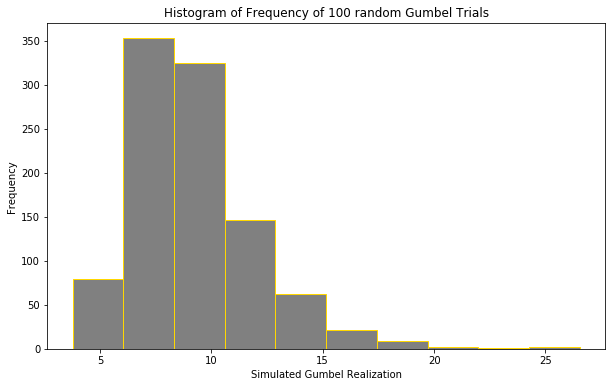

In [16]:
mu = 8 # The loc of the data
beta = 2 # The scale of the data
n_sample = 1000

# Gets the 100 random pulls from the Gumbel dist with loc mu and scale beta.
gumbels = stats.gumbel_r.rvs(loc = mu, scale = beta, size = n_sample)
fig,ax = plt.subplots(1, 1, figsize = (10, 6))

ax.hist(gumbels, color = "grey", edgecolor = "gold")
ax.set_xlabel("Simulated Gumbel Realization")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Frequency of 100 random Gumbel Trials");

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

The mean is given by: $\bar{x} = \mu + \beta \gamma $ where $\gamma$ is the Euler-Mascheroni constant. Plugging in our numbers we get:
$$ \bar{x} = \mu + \beta \gamma = 8 + 2 \gamma \approx 9.1544 $$

The variance is given by: $$ \sigma^2 = \dfrac{\pi^2}{6}*\beta^2 = \dfrac{\pi^2}{6} * 2^2 \approx 6.5797 $$

Using the code below, we also know that the simulated mean is ~ 9.1. Now we can solve for a 95% CI using the equation: $ \bar{x} \pm z_{\alpha/2} * \dfrac{\sigma}{\sqrt{n}} $

$$ CI: 9.1 \pm 1.96 * \dfrac{\sqrt{6.57}}{\sqrt{100}}$$ 

$$ CI: [8.8030, 9.8085] $$

In [17]:
trueMean = 8 + 2 * np.euler_gamma
print("The true mean of the distribution is {}".format(trueMean))
trueVar = np.pi**2 / 6 * beta**2
print("The true variance of the distribution is {}".format(trueVar))
sampleMean = np.mean(gumbels)
print("The simulated mean from the sample is {}".format(sampleMean))

zAlpha = stats.norm.ppf(1 - 0.025)
gumbelCIUpper = sampleMean + zAlpha * math.sqrt(trueVar / n_sample)
gumbelCILower = sampleMean - zAlpha * math.sqrt(trueVar / n_sample)
gumbelCI = [gumbelCILower, gumbelCIUpper]
print("The 95% confidence inteval is {}".format(gumbelCI))

The true mean of the distribution is 9.154431329803066
The true variance of the distribution is 6.579736267392906
The simulated mean from the sample is 9.200274986849777
The 95% confidence inteval is [9.0412913841663016, 9.359258589533253]


**Part C:  A theoretical interlude.** When Stella O'Flaherty (the famous octopus) ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** There is a 95% probability that any given random variable sampled from $Gum(\mu=8, \beta=2)$ will be between 8.81 and 9.82.

1. False. The confidence interval does not describe how often a mean lies within a single interval but how often it lies within many intervals calculated with the same formula.
1. True. This is the definition of confidence intervals. Over many calculation with a 95% significance would mean that 95% would contain the true mean and 5% would not.
1. False. The confidence interval tells us about the true mean of the data, it doesn't tell us anything about individual values.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

In [18]:
def confidence_intervals(m=5000, n=100):
    mu = 8
    beta = 2
    # Your code here
    fig,ax = plt.subplots(1, 1, figsize = (10, 6))
    
    proportion_CIs_covering_mean = 0
    zAlpha = stats.norm.ppf(1 - 0.17)
    for i in range(m):
        mean = np.mean(stats.gumbel_r.rvs(loc = mu, scale = beta, size = n))
        lower = mean - zAlpha * math.sqrt(trueVar) / math.sqrt(n)
        upper = mean + zAlpha * math.sqrt(trueVar) / math.sqrt(n)
        # Plot the first 50 CI's
        if i < 50:
            if (trueMean > lower and trueMean < upper):
                proportion_CIs_covering_mean += 1
                ax.plot([i,i], [lower, upper], color = "black")
            else:
                ax.plot([i,i], [lower, upper], color = "red")
        if(trueMean > lower and trueMean < upper):
            proportion_CIs_covering_mean += 1
    
    # Plot the true mean
    ax.plot([0,49], [trueMean, trueMean], color="steelblue", ls='--', lw=3)
    
    # Set the titles and axes
    ax.set_title("Plot of 50 Confidence Intervals for random pulls from the Gumbel Distribution")
        
    proportion_CIs_covering_mean = proportion_CIs_covering_mean / m
    print("proportion covering mean: {:.3f}".format(proportion_CIs_covering_mean))

proportion covering mean: 0.663


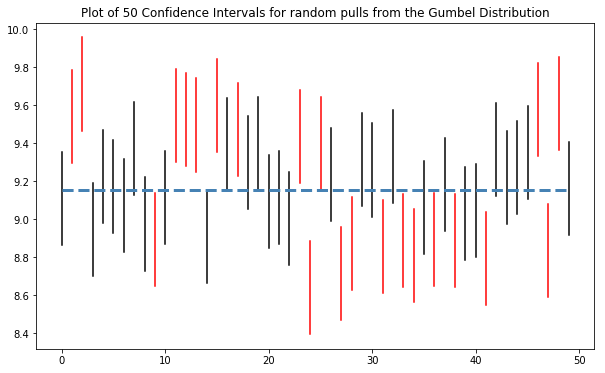

In [19]:
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

The simulated proportion is ~66% which means that about 66 out of every 100 confidence intervals contain the true mean. This is the theoretical definition of a 66% confidence interval, so our simulated values do agree with the theoretical ones.

---

<a id='p4'></a>
[Back to top](#top)

### [15 points] Problem 4 - Freethrows
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You are driving through the paint toward the basket when Steph Curry fouls you. You step to the line to sink this freethrow shot, which is delivered in the form of a CSCI3022 problem:</font>

You have a shuffled deck of cards. It includes the usual 52 cards AND three special additional Octopus cards. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip over the second Octopus.  You repeat this many times. Simulate this process. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot too, using linstyles of green dashed, pink dotted, and black solid, respectively. Look up how to do a legend in MatPlotLib, and label your histogram, mean, median.
***

In [20]:
def PullsUntilOctopuses(sims):
    # Create a deck of 52 cards and add 3 octopus (100+) cards to it
    deck = np.arange(1, 53)
    deck = np.append(deck, 100)
    deck = np.append(deck, 101)
    deck = np.append(deck, 102)

    totalPulls = np.zeros(sims)
    for i in range(sims):
        spareDeck = deck.copy()
        pulls = 0
        octopuses = 0
        while octopuses != 2:
            card = np.random.choice(spareDeck)
            spareDeck = np.setdiff1d(spareDeck, card)
            pulls += 1
            if card - 100 >= 0:
                octopuses += 1
        totalPulls[i] = pulls
    
    # Find stat values
    mean = np.mean(totalPulls)
    median = np.median(totalPulls)
    mode = stats.mode(totalPulls)   
    
    fig,ax = plt.subplots(1, 1, figsize = (10, 6))
    
    ax.hist(totalPulls, bins = 53, color = "lightgrey", edgecolor = "white")
    # Plot the mean, median and mode lines
    plt.axvline(mean, color = "green", ls="--", linewidth = 2, label = "mean")
    plt.axvline(median, color = "hotpink", ls=":", linewidth = 2, label = "median")
    plt.axvline(mode[0], color = "black", label = "mode")
    
    ax.set_title("Histogram of the Number of Pulls of Cards before 2 Octopuses")
    ax.set_xlabel("Number of Pulls")
    ax.set_ylabel("Frequency")
    ax.legend()

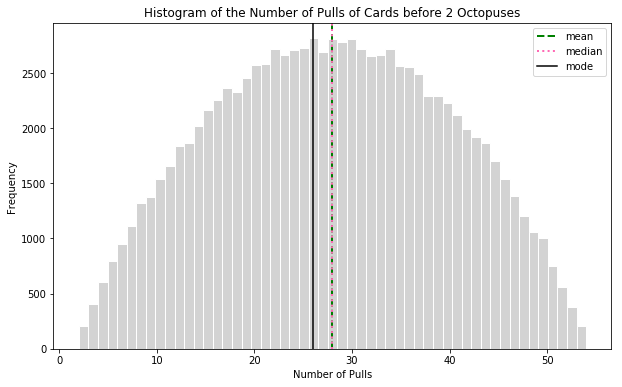

In [21]:
PullsUntilOctopuses(100000)

**Part B**: <font color='green'>You sink your first free throw and immediately get dap from your teammates, Oscar O'Flaherty and Octavia O'Flaherty. You prepare to take another shot, which—and you're not going to believe this—is another CSCI3022 problem:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?
***

In general, a 99% percent confidence interval will be wider because a confidence interval estimates the range that the true mean is in. If you want to be more confident that the interval contains the mean, then the interval will need to contain more values, which means it will be larger than the 95% as that interval contains fewer values. Also, in term of the equation $\bar{x} \pm z_{\alpha/2} * \frac{\sigma}{\sqrt{n}}$, by increasing the signficance, we increase the value of $z_{\alpha}$ which has a direct relation to the increase of the size of the confidence interval. Therefor the 99% has a larger confidence interval than the 95%.

**Part C**: <font color='green'>The crowd is silent. Everything is slow motion. You're literally in the air, releasing what looks to be a perfect shot to tie the match. As you release the ball, a hand appears to block it. It is Kevin Durant. :( 

Luckily, his fingertips also brush against your arm. That's a foul, and everyone saw it. Back to the line. Back to CSCI3022:</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **durant**, below. Compute a 95% confidence interval for the _standard deviation_.
***

In [22]:
durant = np.array([3.7778,3.9459,3.8248,4.1111,4.0180,4.0898,4.0380,3.9273,3.9614,3.8387])

# Not enough values? Bootstrap to the rescue!
m = 1000
resamples = [np.random.choice(durant, size = len(durant), replace = True) for ii in range(m)]
sigmas = [np.std(jj) for jj in resamples]

lower = np.percentile(sigmas, 2.5)
upper = np.percentile(sigmas, 97.5)
CI = [lower, upper]
print("The CI is {}".format(CI))

The CI is [0.064572773351783158, 0.12969458215353388]


To get the confidence interval for the data, we need to use the bootstrap method because there aren't enought data points to use the Central Limit Theorem. From that method, we found a 95% confidence interval of $[0.0827, 0.1221]$.

**Part D**: <font color='green'>"Draymond Green has it all, in spite of living in the Bay Area," you think to yourself. "But he doesn't have this shot..." You're all over him, and he's going to have to pass. You can see the irritation in his eyes. Then you realize that it's not irritation, and he's not being distracted by your superb defense. He's being distracted by this CSCI3022 problem:</font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.

***

A Type I error means that the null was rejected when it was in fact true. In the context of this problem that would mean that the hypothesis that the carbon fiber is strong enough was rejected, even though it actually was strong enough. A Type II error would be accepting the null even though it is false, which would be saying it is strong enough even though it is not. Because of this, we would prefer a lower Type II error. It would be be worse to assume the carbon fiber is strong enough if it actually isn't than to assume it is not strong enough if it actually is.

**Part E**: <font color='green'>You are watching tape footage at halftime with your personal trainer, Stella O'Flaherty. You gotta focus up if you're going to match Klay Thompson's speed in the second half. You take a sip of Gatorade and Dr. O'Flaherty suggests that you do the following CSCI3022 problem:</font>

You measure 53 suckers from baby reef octopuses and find that they are, on average, 45.2 mm wide, with a standard devaition of 30.4mm. 

Then you measure 41 suckers from from baby dumbo octopuses and find that they are, on average, 52.8 mm wide, with a standard deviation of 22.8 mm. 

Is there statistical evidence at the 0.05 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 6 mm?  Use a test of your choice.

***

$\mu_1$ is the mean of baby reef octopuses.  
$\mu_2$ is the mean of baby dumbo octopuses.

Null Hypothesis: $ \mu_2 - \mu_1 = 6$  
Alternate Hypothesis: $ \mu_2 - \mu_1 > 6$

Let's test using a p-value!  
We can solve for the z value using the equation: $z = \dfrac{\mu_2 - \mu_1 - c}{\sqrt{\frac{s_1^2}{m} + \frac{s_2^2}{n}}}$

Plugging our octo-stats in:
$$ z = \dfrac{52.8 - 45.2 - 6}{\sqrt{\dfrac{22.8^2}{41} + \dfrac{30.4^2}{53}}} \approx 0.2916$$

Compare significance:  
$$ 1 - \phi(0.2916) \approx 0.3853 $$

0.3853 is not less than 0.05 so we fail to reject the null hypothesis. There is not enough statistical evidence to say that true mean of dumbo octopus sucker widths exceeds the true mean of baby reef octopuses sucker width by more than 6mm.

In [23]:
z = (52.8 - 45.2 - 6) / math.sqrt(((22.8**2)/41) + ((30.4**2)/53))
print(z)
sig = 1 - stats.norm.cdf(z)
print(sig)

0.2915555403427804
0.385313236382


We can confirm our findings by using another test, such as with a confidence interval. Using the code below, we found that a 95% CI is $[-3.1561, 18.3561]$. This interval contains 0 so we again accept the null hypothesis, confirming our answer above.

In [24]:
l = 52.8 - 45.2 - (1.96 * math.sqrt((22.8**2 / 41) + (30.4**2)/53))
u = 52.8 - 45.2 + (1.96 * math.sqrt((22.8**2 / 41) + (30.4**2)/53))
ci = [l, u]
print(ci)

[-3.1560981222068722, 18.35609812220686]
